### 特徴量エンジニアリング

In [1]:
# ライブラリ
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [29]:
df = pd.read_csv('../data/bike_share.csv')
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


### 日付情報datetimeから新しい特徴量を作成する

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


datatimeがobject型(文字列)になっている

In [31]:

type(df['datetime'].iloc[0])

str

日付形式に変換

In [32]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [33]:
df['datetime'].iloc[0]

Timestamp('2011-01-01 00:00:00')

In [34]:
# datatimeが日付形式(datatime)になっていることを確認
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [35]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [37]:
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['dayofyear'] = df['datetime'].dt.dayofyear
df['dayofweek'] = df['datetime'].dt.dayofweek
df['weekofyear'] = df['datetime'].dt.isocalendar().week

df['quarter'] = df['datetime'].dt.quarter
df['leap_year'] = df['datetime'].dt.is_leap_year
df['day'] = df['datetime'].dt.day

In [38]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,dayofyear,dayofweek,weekofyear,quarter,leap_year,day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,5,52,1,False,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,5,52,1,False,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,5,52,1,False,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,5,52,1,False,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,5,52,1,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,354,2,51,4,True,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,354,2,51,4,True,19
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,354,2,51,4,True,19
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,354,2,51,4,True,19


### 多項式特徴量

In [6]:
df = pd.read_csv('../data/penguins_size.csv')
df.dropna(inplace=True)
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [8]:
df.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [21]:
#  多項式特徴量を作成するためのモジュール
from sklearn.preprocessing import PolynomialFeatures

#  多項式特徴量を作成するためのインスタンス
poly = PolynomialFeatures(degree=2, include_bias=False)
df[['culmen_length_mm', 'culmen_length_mm', 'culmen_length_mm^2','culmen_length_mm * culmen_depth_mm', 'culmen_depth_mm^2',]] = poly.fit_transform(df[['culmen_length_mm', 'culmen_depth_mm']])

In [22]:
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,culmen_length_mm^2,culmen_depth_mm^2,culmen_length_mm * culmen_depth_mm
0,Adelie,Torgersen,18.7,18.7,181.0,3750.0,MALE,1528.81,349.69,731.17
1,Adelie,Torgersen,17.4,17.4,186.0,3800.0,FEMALE,1560.25,302.76,687.30
2,Adelie,Torgersen,18.0,18.0,195.0,3250.0,FEMALE,1624.09,324.00,725.40
4,Adelie,Torgersen,19.3,19.3,193.0,3450.0,FEMALE,1346.89,372.49,708.31
5,Adelie,Torgersen,20.6,20.6,190.0,3650.0,MALE,1544.49,424.36,809.58
...,...,...,...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,13.7,13.7,214.0,4925.0,FEMALE,2227.84,187.69,646.64
340,Gentoo,Biscoe,14.3,14.3,215.0,4850.0,FEMALE,2190.24,204.49,669.24
341,Gentoo,Biscoe,15.7,15.7,222.0,5750.0,MALE,2540.16,246.49,791.28
342,Gentoo,Biscoe,14.8,14.8,212.0,5200.0,FEMALE,2043.04,219.04,668.96


/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

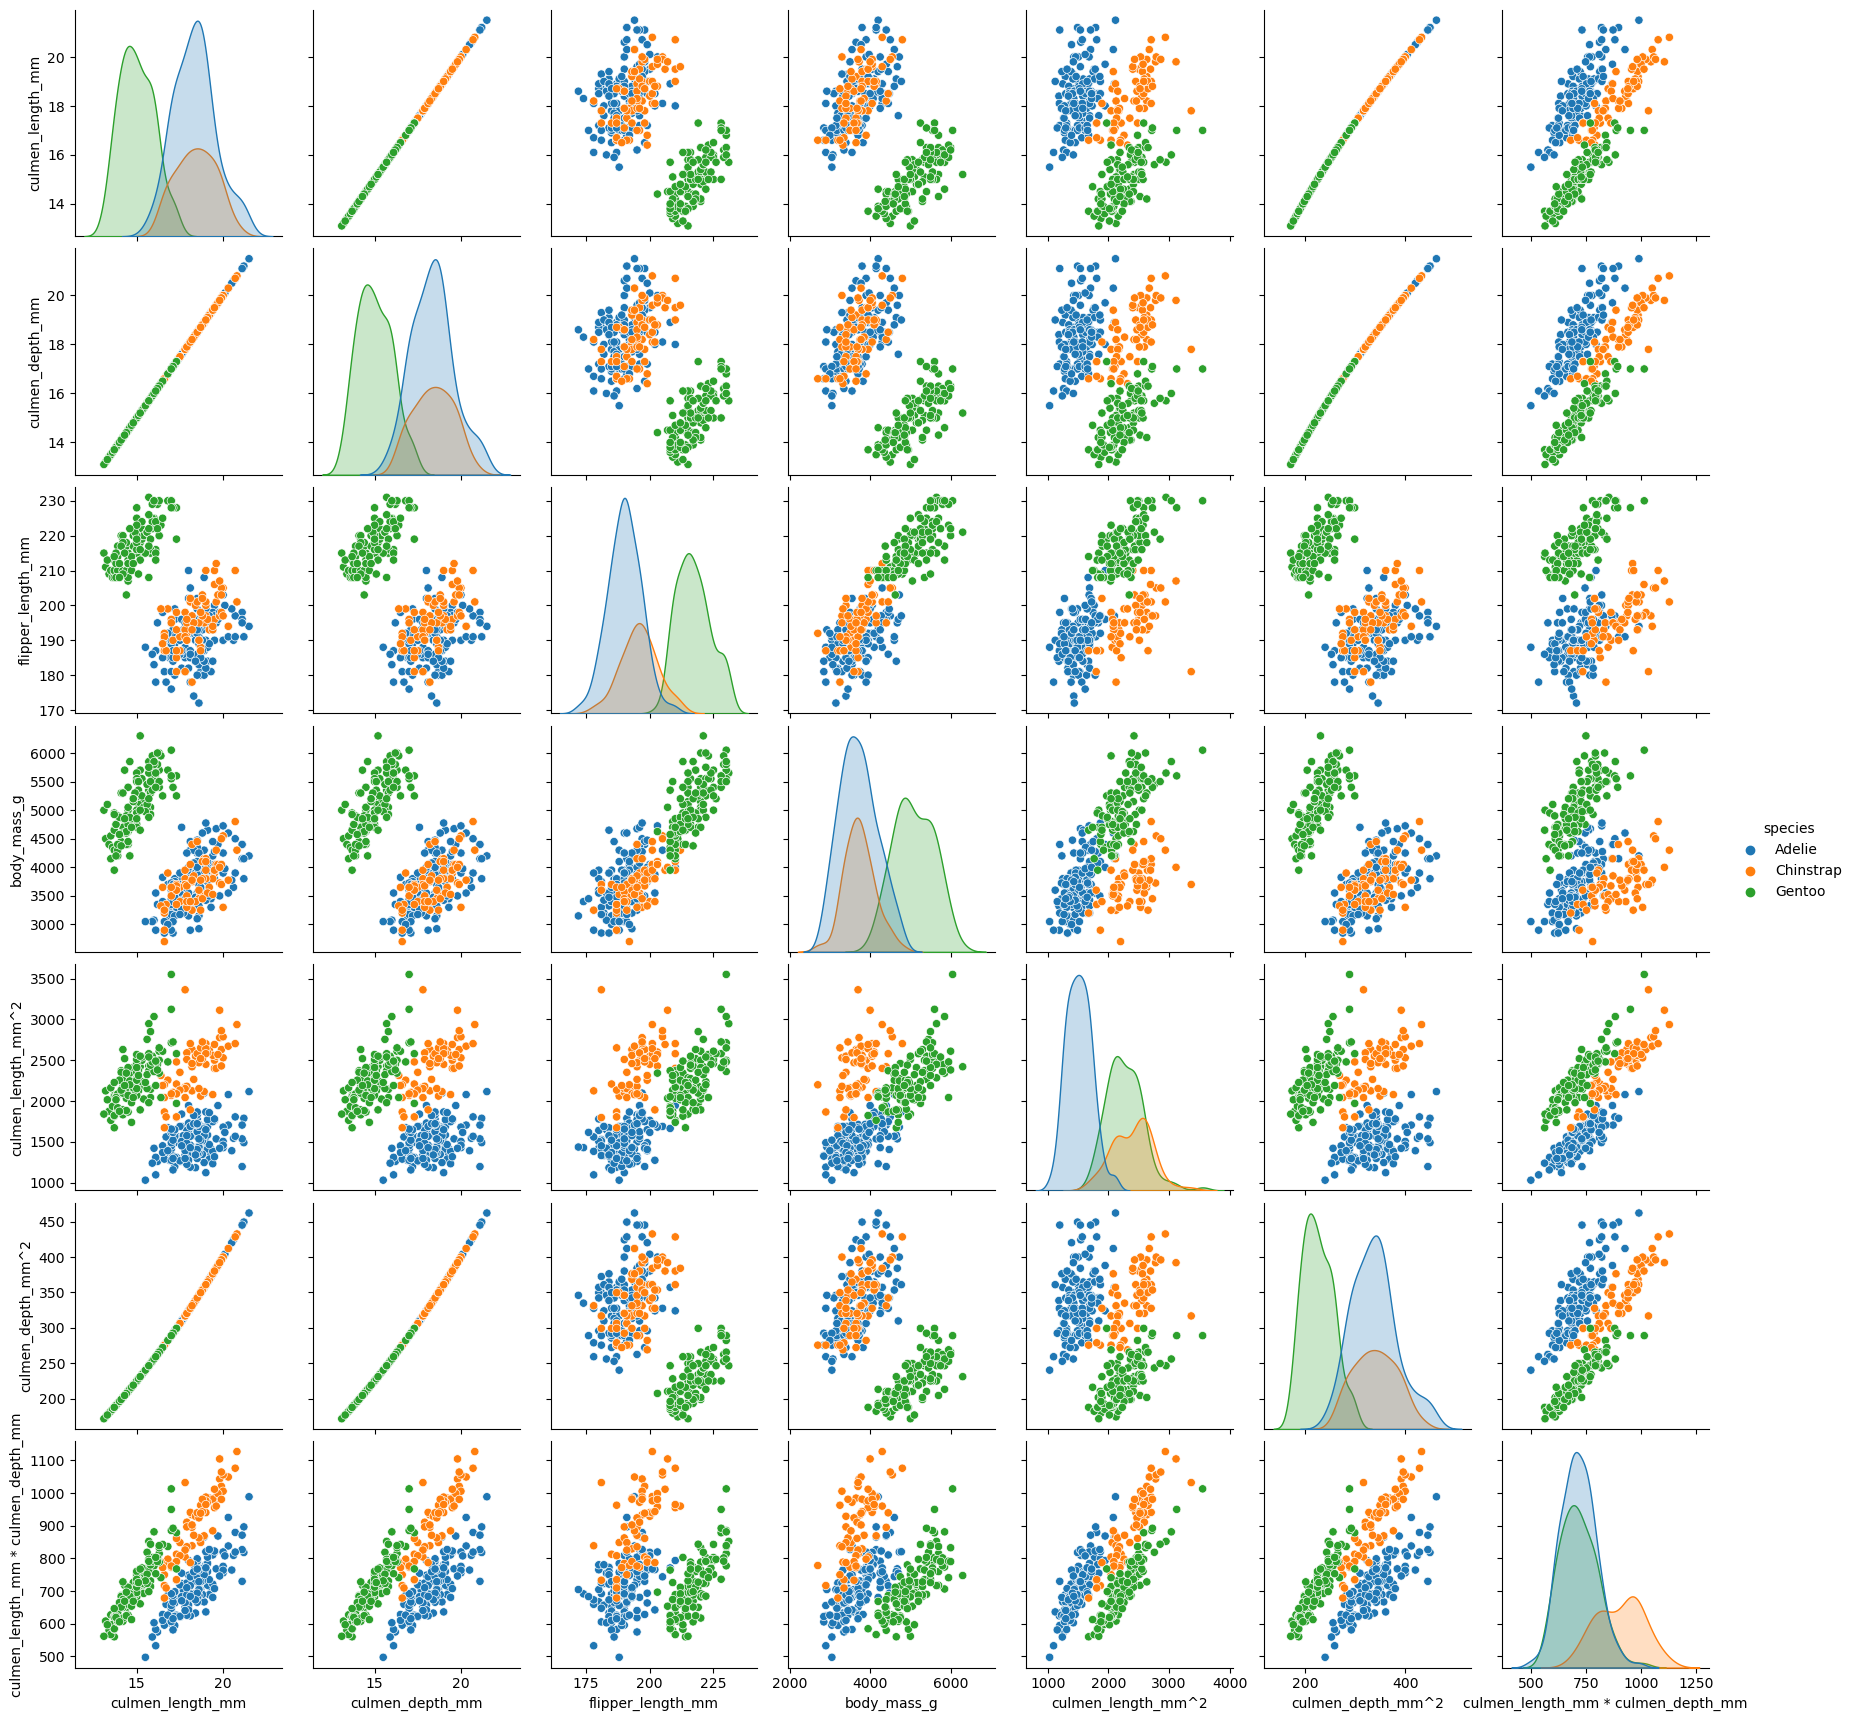

In [23]:
sns.pairplot(df, hue='species')

### binning

In [24]:
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,culmen_length_mm^2,culmen_depth_mm^2,culmen_length_mm * culmen_depth_mm
0,Adelie,Torgersen,18.7,18.7,181.0,3750.0,MALE,1528.81,349.69,731.17
1,Adelie,Torgersen,17.4,17.4,186.0,3800.0,FEMALE,1560.25,302.76,687.30
2,Adelie,Torgersen,18.0,18.0,195.0,3250.0,FEMALE,1624.09,324.00,725.40
4,Adelie,Torgersen,19.3,19.3,193.0,3450.0,FEMALE,1346.89,372.49,708.31
5,Adelie,Torgersen,20.6,20.6,190.0,3650.0,MALE,1544.49,424.36,809.58
...,...,...,...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,13.7,13.7,214.0,4925.0,FEMALE,2227.84,187.69,646.64
340,Gentoo,Biscoe,14.3,14.3,215.0,4850.0,FEMALE,2190.24,204.49,669.24
341,Gentoo,Biscoe,15.7,15.7,222.0,5750.0,MALE,2540.16,246.49,791.28
342,Gentoo,Biscoe,14.8,14.8,212.0,5200.0,FEMALE,2043.04,219.04,668.96


In [26]:
df['body_mass_g_bin'] = pd.cut(df['body_mass_g'], bins=10, labels=False)


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 334 entries, 0 to 343
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   species                             334 non-null    object 
 1   island                              334 non-null    object 
 2   culmen_length_mm                    334 non-null    float64
 3   culmen_depth_mm                     334 non-null    float64
 4   flipper_length_mm                   334 non-null    float64
 5   body_mass_g                         334 non-null    float64
 6   sex                                 334 non-null    object 
 7   culmen_length_mm^2                  334 non-null    float64
 8   culmen_depth_mm^2                   334 non-null    float64
 9   culmen_length_mm * culmen_depth_mm  334 non-null    float64
 10  body_mass_g_bin                     334 non-null    int64  
dtypes: float64(7), int64(1), object(3)
memory usage: 3

In [29]:
# binを作ったがint型なのでobject型に変換
df['body_mass_g_bin'] = df['body_mass_g_bin'].astype('object')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 334 entries, 0 to 343
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   species                             334 non-null    object 
 1   island                              334 non-null    object 
 2   culmen_length_mm                    334 non-null    float64
 3   culmen_depth_mm                     334 non-null    float64
 4   flipper_length_mm                   334 non-null    float64
 5   body_mass_g                         334 non-null    float64
 6   sex                                 334 non-null    object 
 7   culmen_length_mm^2                  334 non-null    float64
 8   culmen_depth_mm^2                   334 non-null    float64
 9   culmen_length_mm * culmen_depth_mm  334 non-null    float64
 10  body_mass_g_bin                     334 non-null    object 
dtypes: float64(7), object(4)
memory usage: 31.3+ KB


### 四則演算で特徴量を作成する

In [31]:
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,culmen_length_mm^2,culmen_depth_mm^2,culmen_length_mm * culmen_depth_mm,body_mass_g_bin
0,Adelie,Torgersen,18.7,18.7,181.0,3750.0,MALE,1528.81,349.69,731.17,2
1,Adelie,Torgersen,17.4,17.4,186.0,3800.0,FEMALE,1560.25,302.76,687.30,3
2,Adelie,Torgersen,18.0,18.0,195.0,3250.0,FEMALE,1624.09,324.00,725.40,1
4,Adelie,Torgersen,19.3,19.3,193.0,3450.0,FEMALE,1346.89,372.49,708.31,2
5,Adelie,Torgersen,20.6,20.6,190.0,3650.0,MALE,1544.49,424.36,809.58,2
...,...,...,...,...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,13.7,13.7,214.0,4925.0,FEMALE,2227.84,187.69,646.64,6
340,Gentoo,Biscoe,14.3,14.3,215.0,4850.0,FEMALE,2190.24,204.49,669.24,5
341,Gentoo,Biscoe,15.7,15.7,222.0,5750.0,MALE,2540.16,246.49,791.28,8
342,Gentoo,Biscoe,14.8,14.8,212.0,5200.0,FEMALE,2043.04,219.04,668.96,6


In [32]:
# くちばしの長さと深さの差, 比率を特徴量として追加
df['culmen_df'] = df['culmen_length_mm'] - df['culmen_depth_mm']
df['culmen_df_ratio'] = df['culmen_length_mm'] / df['culmen_depth_mm']



/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

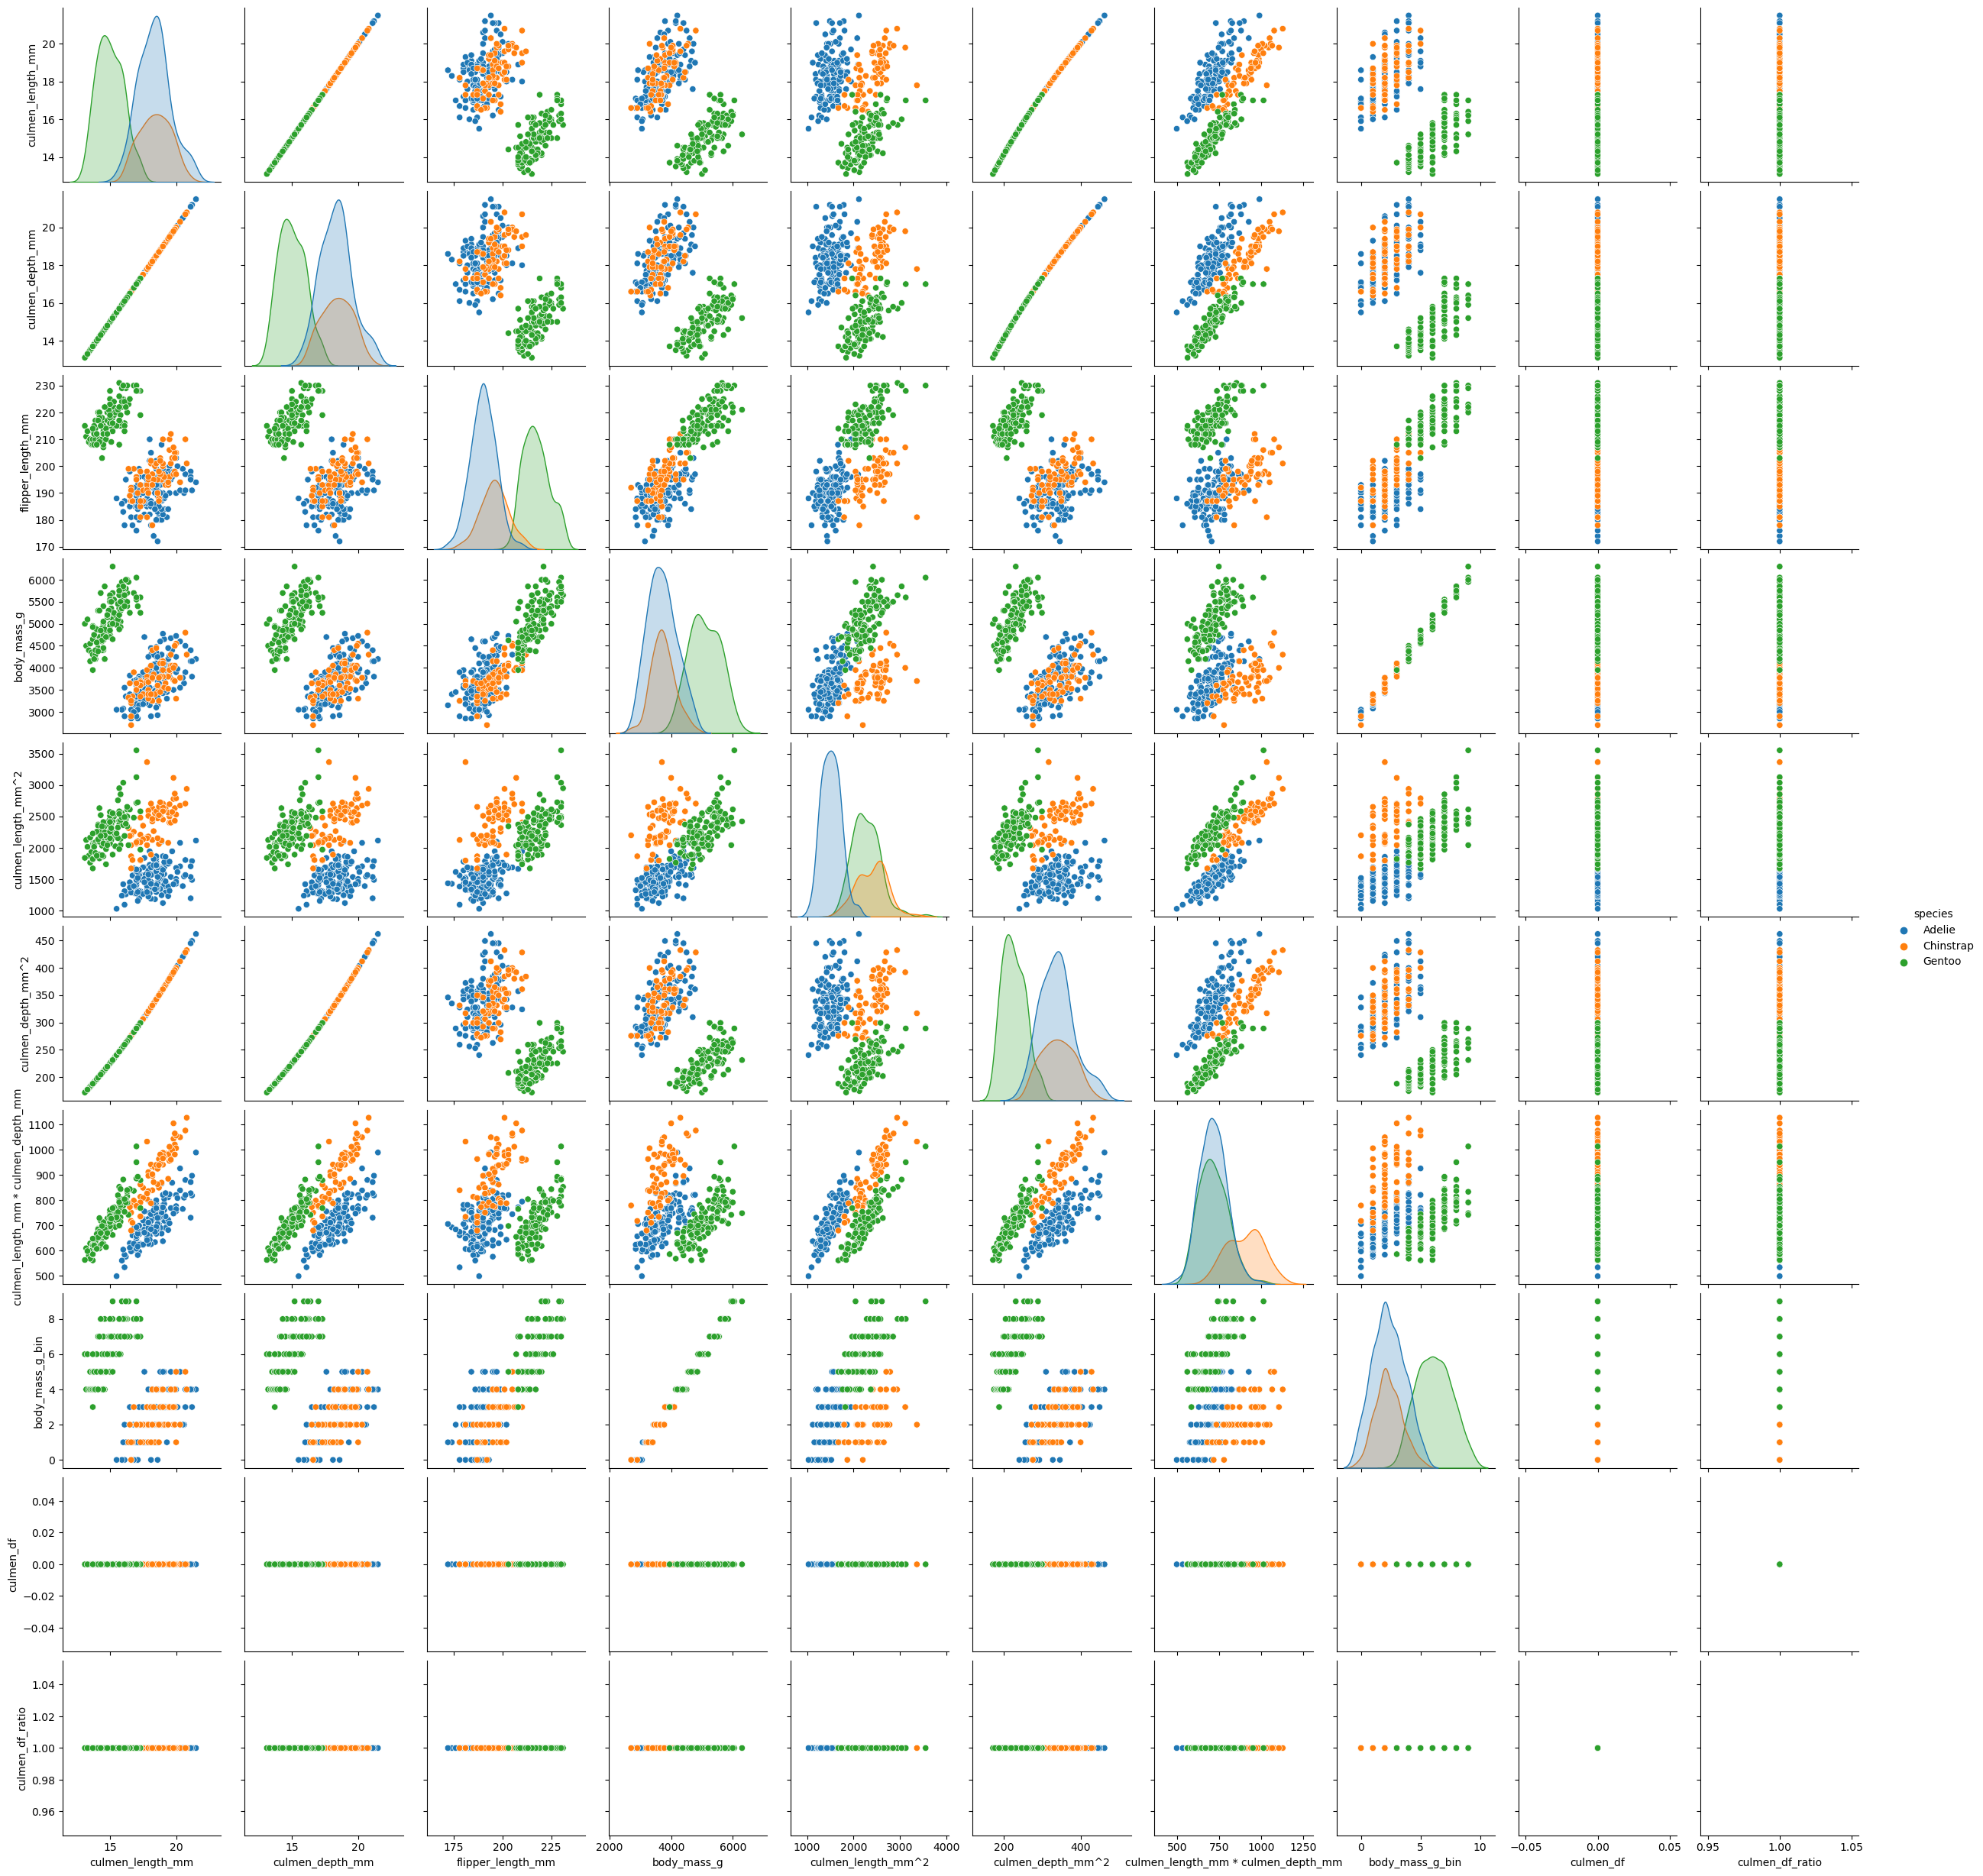

In [33]:
sns.pairplot(df, hue='species')

### 集約値

groupbyやjoin. mergeをすることで集約値を作れる

In [56]:
df_app = pd.read_csv('../data/homecredit_application.csv')
df_prev_app = pd.read_csv('../data/homecredit_previous_application.csv')

In [57]:
df_app

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,101152,0,Cash loans,F,N,N,0,112500.0,495985.5,17946.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0
996,101153,0,Cash loans,F,N,Y,0,225000.0,1113840.0,57001.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
997,101154,0,Cash loans,F,Y,Y,0,144000.0,517536.0,28206.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
998,101155,0,Cash loans,M,N,Y,0,315000.0,1288350.0,37800.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,1.0


In [58]:
df_prev_app

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,1891648,100373,Consumer loans,10872.990,115695.0,115119.0,11569.5,115695.0,SATURDAY,22,...,Industry,12.0,low_normal,POS household with interest,365243.0,-1013.0,-683.0,-713.0,-709.0,0.0
1,2670402,100077,Cash loans,NaN,0.0,0.0,NaN,NaN,WEDNESDAY,14,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
2,1514511,101011,Consumer loans,6856.065,65866.5,66735.0,6588.0,65866.5,FRIDAY,21,...,Consumer electronics,12.0,middle,POS household with interest,365243.0,-596.0,-266.0,-296.0,-289.0,0.0
3,1539382,100425,Consumer loans,13410.270,120357.0,133065.0,0.0,120357.0,FRIDAY,15,...,Consumer electronics,12.0,middle,POS household with interest,365243.0,-558.0,-228.0,-378.0,-351.0,0.0
4,1614986,100151,Cash loans,6535.800,45000.0,55075.5,NaN,45000.0,WEDNESDAY,13,...,XNA,12.0,high,Cash Street: high,365243.0,-1011.0,-681.0,-681.0,-672.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4764,2364400,100152,Cash loans,NaN,0.0,0.0,NaN,NaN,SUNDAY,7,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
4765,2095141,100779,Consumer loans,6082.830,47430.0,52123.5,0.0,47430.0,FRIDAY,17,...,Consumer electronics,12.0,high,POS household with interest,365243.0,-2642.0,-2312.0,-2312.0,-2307.0,1.0
4766,1617498,100580,Consumer loans,12698.730,121711.5,134563.5,0.0,121711.5,SUNDAY,14,...,Consumer electronics,12.0,low_normal,POS household with interest,365243.0,-1108.0,-778.0,-838.0,-831.0,0.0
4767,1139648,100166,Consumer loans,13924.305,68841.0,72477.0,0.0,68841.0,FRIDAY,11,...,Consumer electronics,6.0,middle,POS household with interest,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
df_columns = pd.read_csv('../data/homecredit_columns_description.csv', encoding='latin-1')
df_columns

,Table,Row,Description,Special
0,homecredit_application.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,homecredit_application.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
2,homecredit_application.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,homecredit_application.csv,CODE_GENDER,Gender of the client,NaN
4,homecredit_application.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN
...,...,...,...,...
155,homecredit_previous_application.csv,DAYS_FIRST_DUE,Relative to application date of current applic...,time only relative to the application
156,homecredit_previous_application.csv,DAYS_LAST_DUE_1ST_VERSION,Relative to application date of current applic...,time only relative to the application
157,homecredit_previous_application.csv,DAYS_LAST_DUE,Relative to application date of current applic...,time only relative to the application
158,homecredit_previous_application.csv,DAYS_TERMINATION,Relative to application date of current applic...,time only relative to the application


In [60]:
# データフレームをSK_ID_CURRをキーとしてソートする
df_prev_app.sort_values('SK_ID_CURR', inplace=True)
df_prev_app

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
2547,1038818,100002,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9,...,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
3507,2396755,100003,Consumer loans,6737.310,68809.5,68053.5,6885.0,68809.5,SATURDAY,15,...,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
1654,1810518,100003,Cash loans,98356.995,900000.0,1035882.0,NaN,900000.0,FRIDAY,12,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2934,2636178,100003,Consumer loans,64567.665,337500.0,348637.5,0.0,337500.0,SUNDAY,17,...,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
2669,1564014,100004,Consumer loans,5357.250,24282.0,20106.0,4860.0,24282.0,FRIDAY,5,...,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3245,1542916,101156,Consumer loans,4403.835,16627.5,15457.5,1665.0,16627.5,MONDAY,12,...,Connectivity,4.0,low_normal,POS mobile with interest,365243.0,-2870.0,-2780.0,-2810.0,-2671.0,1.0
1422,2541853,101156,Cash loans,20707.650,405000.0,405000.0,NaN,405000.0,WEDNESDAY,8,...,Consumer electronics,36.0,middle,Cash X-Sell: middle,365243.0,-1161.0,-111.0,-681.0,-676.0,0.0
2533,2653888,101156,Cash loans,45506.025,1129500.0,1227901.5,NaN,1129500.0,MONDAY,10,...,XNA,36.0,low_action,Cash X-Sell: low,NaN,NaN,NaN,NaN,NaN,NaN
3606,2425247,101156,Consumer loans,2799.720,21055.5,21951.0,1080.0,21055.5,THURSDAY,16,...,Connectivity,12.0,high,POS mobile with interest,365243.0,-1712.0,-1382.0,-1382.0,-1376.0,0.0


In [63]:
df_merged = pd.merge(df_app, df_prev_app.groupby('SK_ID_CURR')['AMT_CREDIT'].sum().reset_index(), on='SK_ID_CURR', how='left')
df_merged.rename(columns={'AMT_CREDIT': 'credit'}, inplace=True)


In [64]:
df_merged

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_CREDIT_y
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,179055.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1452573.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,20106.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2625259.5
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,999832.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,101152,0,Cash loans,F,N,N,0,112500.0,495985.5,17946.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0,2476305.0
996,101153,0,Cash loans,F,N,Y,0,225000.0,1113840.0,57001.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,41850.0
997,101154,0,Cash loans,F,Y,Y,0,144000.0,517536.0,28206.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,478867.5
998,101155,0,Cash loans,M,N,Y,0,315000.0,1288350.0,37800.0,...,0,0,0,0.0,0.0,0.0,1.0,1.0,1.0,269901.0


答え

In [65]:
df_app = pd.read_csv('../data/homecredit_application.csv')
df_prev_app = pd.read_csv('../data/homecredit_previous_application.csv')

In [66]:
df_app.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
df_prev_app.head(3)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,1891648,100373,Consumer loans,10872.990,115695.0,115119.0,11569.5,115695.0,SATURDAY,22,...,Industry,12.0,low_normal,POS household with interest,365243.0,-1013.0,-683.0,-713.0,-709.0,0.0
1,2670402,100077,Cash loans,NaN,0.0,0.0,NaN,NaN,WEDNESDAY,14,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
2,1514511,101011,Consumer loans,6856.065,65866.5,66735.0,6588.0,65866.5,FRIDAY,21,...,Consumer electronics,12.0,middle,POS household with interest,365243.0,-596.0,-266.0,-296.0,-289.0,0.0


In [70]:
# ソートする
df_prev_app.sort_values('SK_ID_CURR').head(3)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
2547,1038818,100002,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9,...,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
3507,2396755,100003,Consumer loans,6737.310,68809.5,68053.5,6885.0,68809.5,SATURDAY,15,...,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
1654,1810518,100003,Cash loans,98356.995,900000.0,1035882.0,NaN,900000.0,FRIDAY,12,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0


In [76]:
# カラムのリストを渡すとデータフレームで出力する
# IDごとにAMT_CREDITの合計を算出
credit_prev_sum = df_prev_app.groupby('SK_ID_CURR')[['AMT_CREDIT']].sum()

In [77]:
# 合算する
# joinは左の表と右の表をjoinする
df_app.join(credit_prev_sum, on='SK_ID_CURR', rsuffix='_PREV_SUM')

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_CREDIT_PREV_SUM
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,179055.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1452573.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,20106.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2625259.5
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,999832.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,101152,0,Cash loans,F,N,N,0,112500.0,495985.5,17946.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0,2476305.0
996,101153,0,Cash loans,F,N,Y,0,225000.0,1113840.0,57001.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,41850.0
997,101154,0,Cash loans,F,Y,Y,0,144000.0,517536.0,28206.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,478867.5
998,101155,0,Cash loans,M,N,Y,0,315000.0,1288350.0,37800.0,...,0,0,0,0.0,0.0,0.0,1.0,1.0,1.0,269901.0
